In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

# KNN

### Neighbors

In [31]:
knn_n_training_accuracy  = []  
knn_n_test_accuracy = []

for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_n_training_accuracy.append(f1_score(y_train, knn.predict(X_train),average='weighted'))
    knn_n_test_accuracy.append(f1_score(y_test, knn.predict(X_test),average='weighted'))

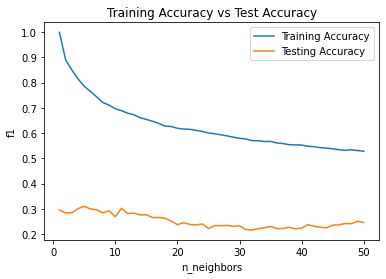

In [32]:
plt.figure()
plt.plot(range(1, 51), knn_n_training_accuracy, label='Training Accuracy')
plt.plot(range(1, 51), knn_n_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()


### Leaf Size

In [35]:
knn_leaf_training_accuracy  = []  
knn_leaf_test_accuracy = []

l_params = [5*i for i in range(1,11)]

for i in range(len(l_params)):
    knn = KNeighborsClassifier(leaf_size = l_params[i])
    knn.fit(X_train, y_train)
    knn_leaf_training_accuracy.append(f1_score(y_train, knn.predict(X_train),average='weighted'))
    knn_leaf_test_accuracy.append(f1_score(y_test, knn.predict(X_test),average='weighted'))

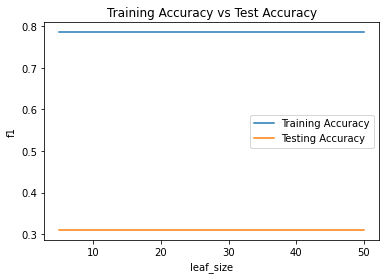

In [37]:
plt.figure()
plt.plot(l_params, knn_leaf_training_accuracy, label='Training Accuracy')
plt.plot(l_params, knn_leaf_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('leaf_size')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

# DTC

### Leaf Size

In [5]:
dtc_depth_training_accuracy  = []  
dtc_depth_test_accuracy = []

for i in range(1, 31):
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(X_train, y_train)
    dtc_depth_training_accuracy.append(f1_score(y_train, dtc.predict(X_train),average='weighted'))
    dtc_depth_test_accuracy.append(f1_score(y_test, dtc.predict(X_test),average='weighted'))

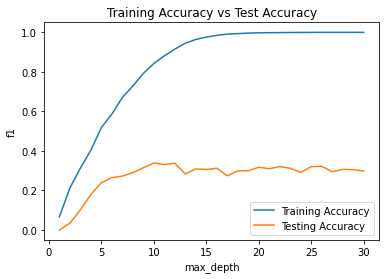

In [6]:
plt.figure()
plt.plot(range(1, 31), dtc_depth_training_accuracy, label='Training Accuracy')
plt.plot(range(1, 31), dtc_depth_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()


### Leaf Nodes

In [39]:
dtc_leaf_training_accuracy  = []  
dtc_leaf_test_accuracy = []

for i in range(2, 31):
    dtc = DecisionTreeClassifier(max_leaf_nodes = i)
    dtc.fit(X_train, y_train)
    dtc_leaf_training_accuracy.append(f1_score(y_train, dtc.predict(X_train),average='weighted'))
    dtc_leaf_test_accuracy.append(f1_score(y_test, dtc.predict(X_test),average='weighted'))

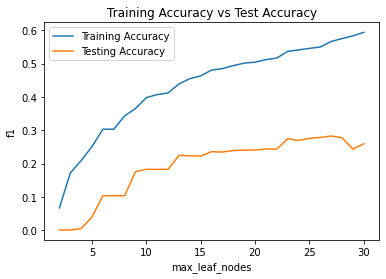

In [43]:
plt.figure()
plt.plot(range(2, 31), dtc_leaf_training_accuracy, label='Training Accuracy')
plt.plot(range(2, 31), dtc_leaf_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('max_leaf_nodes')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()


### Simple Split

In [52]:
dtc_split_training_accuracy  = []  
dtc_split_test_accuracy = []

for i in range(2, 1001):
    dtc = DecisionTreeClassifier(min_samples_split = i)
    dtc.fit(X_train, y_train)
    dtc_split_training_accuracy.append(f1_score(y_train, dtc.predict(X_train),average='weighted'))
    dtc_split_test_accuracy.append(f1_score(y_test, dtc.predict(X_test),average='weighted'))

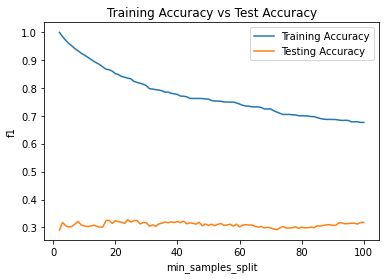

In [51]:
plt.figure()
plt.plot(range(2, 1001), dtc_split_training_accuracy, label='Training Accuracy')
plt.plot(range(2, 1001), dtc_split_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()


# RFC

### Max Depth

In [53]:
rfc_depth_training_accuracy  = []  
rfc_depth_test_accuracy = []

for i in range(1, 31):
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train, y_train)
    rfc_depth_training_accuracy.append(f1_score(y_train, rfc.predict(X_train),average='weighted'))
    rfc_depth_test_accuracy.append(f1_score(y_test, rfc.predict(X_test),average='weighted'))

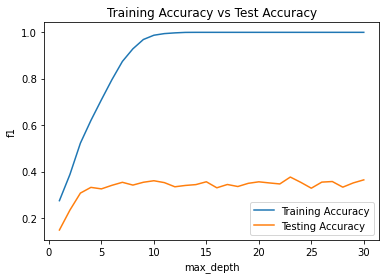

In [54]:
plt.figure()
plt.plot(range(1, 31), rfc_depth_training_accuracy, label='Training Accuracy')
plt.plot(range(1, 31), rfc_depth_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()


### N Estimators

In [56]:
rfc_n_training_accuracy  = []  
rfc_n_test_accuracy = []

for i in range(1, 201):
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train, y_train)
    rfc_n_training_accuracy.append(f1_score(y_train, rfc.predict(X_train),average='weighted'))
    rfc_n_test_accuracy.append(f1_score(y_test, rfc.predict(X_test),average='weighted'))

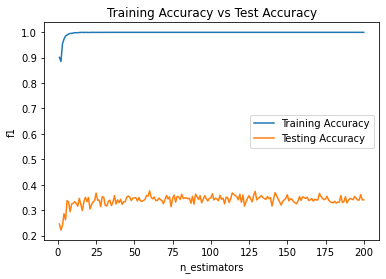

In [57]:
plt.figure()
plt.plot(range(1, 201), rfc_n_training_accuracy, label='Training Accuracy')
plt.plot(range(1, 201), rfc_n_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

### Min Samples Split

In [59]:
rfc_split_training_accuracy  = []  
rfc_split_test_accuracy = []

for i in range(2, 31):
    rfc = RandomForestClassifier(min_samples_split = i)
    rfc.fit(X_train, y_train)
    rfc_split_training_accuracy.append(f1_score(y_train, rfc.predict(X_train),average='weighted'))
    rfc_split_test_accuracy.append(f1_score(y_test, rfc.predict(X_test),average='weighted'))

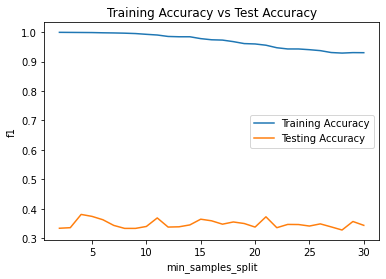

In [61]:
plt.figure()
plt.plot(range(2, 31), rfc_split_training_accuracy, label='Training Accuracy')
plt.plot(range(2, 31), rfc_split_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

### Min Samples Leaf

In [60]:
rfc_leaf_training_accuracy  = []  
rfc_leaf_test_accuracy = []

for i in range(1, 31):
    rfc = RandomForestClassifier(min_samples_leaf = i)
    rfc.fit(X_train, y_train)
    rfc_leaf_training_accuracy.append(f1_score(y_train, rfc.predict(X_train),average='weighted'))
    rfc_leaf_test_accuracy.append(f1_score(y_test, rfc.predict(X_test),average='weighted'))

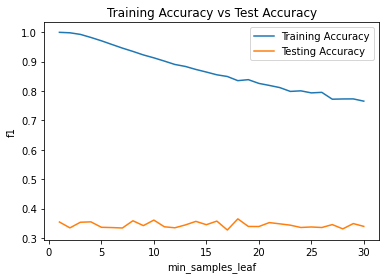

In [62]:
plt.figure()
plt.plot(range(1, 31), rfc_leaf_training_accuracy, label='Training Accuracy')
plt.plot(range(1, 31), rfc_leaf_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

# SVC

In [9]:
print(1e-5)

1e-05


In [28]:
svc_training_accuracy  = []  
svc_test_accuracy = []

c_params = [1e-4,1e-3,1e-2,0.1,1,10,100,1000]

for i in range(len(c_params)):
    svc = SVC(C = c_params[i])
    svc.fit(X_train, y_train)
    svc_training_accuracy.append(f1_score(y_train, svc.predict(X_train),average='weighted'))
    svc_test_accuracy.append(f1_score(y_test, svc.predict(X_test),average='weighted'))

In [29]:
import numpy as np
np.log10(c_params)

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.])

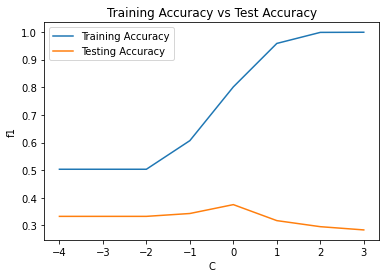

In [30]:
plt.figure()
plt.plot(np.log10(c_params), svc_training_accuracy, label='Training Accuracy')
plt.plot(np.log10(c_params), svc_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('C')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

# MLP

### Max Iter

In [63]:
mlp_iter_training_accuracy  = []  
mlp_iter_test_accuracy = []

i_params = [50*i for i in range(1,11)]

for i in range(len(i_params)):
    mlp = MLPClassifier(max_iter = i_params[i])
    mlp.fit(X_train, y_train)
    mlp_iter_training_accuracy.append(f1_score(y_train, mlp.predict(X_train),average='weighted'))
    mlp_iter_test_accuracy.append(f1_score(y_test, mlp.predict(X_test),average='weighted'))

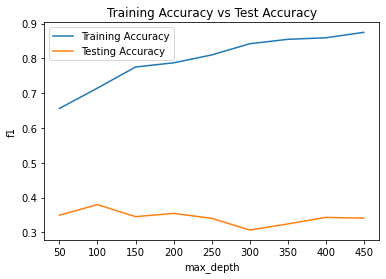

In [23]:
plt.figure()
plt.plot(i_params, mlp_iter_training_accuracy, label='Training Accuracy')
plt.plot(i_params, mlp_iter_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('max_iter')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

### Hidden Layer Sizes

In [64]:
mlp_layer_training_accuracy  = []  
mlp_layer_test_accuracy = []

hl_params = [5*i for i in range(1,51)]

for i in range(len(i_params)):
    mlp = MLPClassifier(hidden_layer_sizes = hl_params[i])
    mlp.fit(X_train, y_train)
    mlp_layer_training_accuracy.append(f1_score(y_train, mlp.predict(X_train),average='weighted'))
    mlp_layer_test_accuracy.append(f1_score(y_test, mlp.predict(X_test),average='weighted'))

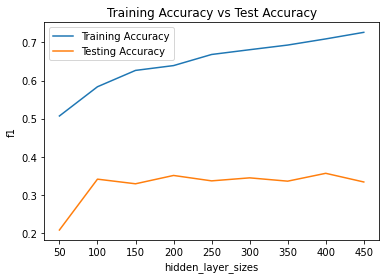

In [65]:
plt.figure()
plt.plot(i_params, mlp_layer_training_accuracy, label='Training Accuracy')
plt.plot(i_params, mlp_layer_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

### Alpha

In [75]:
mlp_alpha_training_accuracy  = []  
mlp_alpha_test_accuracy = []

a_params = [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,1,10,100,1000]

for i in range(len(a_params)):
    mlp = MLPClassifier(alpha = a_params[i])
    mlp.fit(X_train, y_train)
    mlp_alpha_training_accuracy.append(f1_score(y_train, mlp.predict(X_train),average='weighted'))
    mlp_alpha_test_accuracy.append(f1_score(y_test, mlp.predict(X_test),average='weighted'))

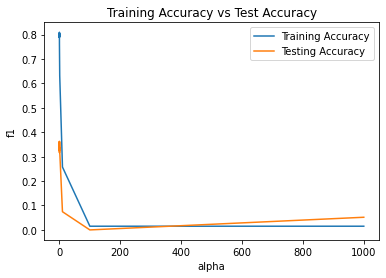

In [77]:
plt.figure()
plt.plot(a_params, mlp_alpha_training_accuracy, label='Training Accuracy')
plt.plot(a_params, mlp_alpha_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('alpha')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

### Epsilon

In [74]:
mlp_epsilon_training_accuracy  = []  
mlp_epsilon_test_accuracy = []

e_params = [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,1,10,100,1000]

for i in range(len(e_params)):
    mlp = MLPClassifier(epsilon = e_params[i])
    mlp.fit(X_train, y_train)
    mlp_epsilon_training_accuracy.append(f1_score(y_train, mlp.predict(X_train),average='weighted'))
    mlp_epsilon_test_accuracy.append(f1_score(y_test, mlp.predict(X_test),average='weighted'))

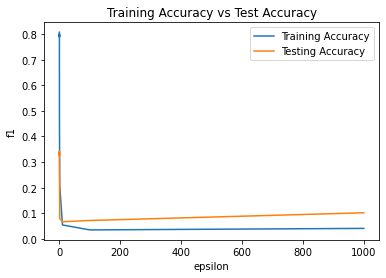

In [76]:
plt.figure()
plt.plot(e_params, mlp_epsilon_training_accuracy, label='Training Accuracy')
plt.plot(e_params, mlp_epsilon_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('epsilon')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()